In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [5]:
def read_data(path):
    data = np.load(path)
    labels = data.T[-1]
    data = np.delete(data.T, -1, 0)
    
    return data.T, labels
x_train, y_train = read_data("fashion_train.npy")
x_train = np.load("data_0-1_norm.npy")
_, y_test = read_data("fashion_test.npy")
x_test = np.load("normalized_test.npy")

In [6]:
def calc_class_scat_mat(X,Y,label,mean):
    cov_mat = np.zeros((X.shape[1],X.shape[1]))
    for i in range(len(Y)):
        if label == Y[i]:
            cov_mat = cov_mat + np.matmul((X[i]).reshape(X.shape[1],1)-mean,(X[i]).reshape(X.shape[1],1).T-mean.T)
    return cov_mat

def one_dim_LDA(X,Y):
    class_zero_idxs = np.where(Y == 0)
    class_one_idxs = np.where(Y == 1)
    mean_zero = np.mean(X[class_zero_idxs],axis = 0).reshape(X.shape[1],1)
    mean_one = np.mean(X[class_one_idxs],axis = 0).reshape(X.shape[1],1)
    S_0 = calc_class_scat_mat(X,Y,0,mean_zero)
    print(S_0.shape)
    S_1 = calc_class_scat_mat(X,Y,1,mean_one)
    print(S_1.shape)
    S_W = S_0 + S_1
    w = np.matmul(np.linalg.inv(S_W),(mean_one-mean_zero))
    return w
    

#w = one_dim_LDA(filtered_x,filtered_y)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def sum_list_of_mats(mat_list):
    sum_mat = np.zeros(mat_list[0].shape)
    for mat in mat_list:
        sum_mat = sum_mat + mat
    return sum_mat

In [9]:
classes = [0,1,2,3,4]
X = x_test
Y = y_test
X[ np.where( Y == 1 )]
l=[np.mean( X[ np.where( Y == clss ) ],axis = 0).reshape(X.shape[1],1) for clss in classes]

In [10]:
def general_LDA(classes ,projection_dim ,X ,Y ):
    class_means = [ np.mean( X[ np.where( Y == clss ) ],axis = 0).reshape(X.shape[1],1)
                   for clss in classes ]
    scatter_mats = [calc_class_scat_mat(X,Y,classes[i],class_means[i])
                    for i in range(len(classes))]
    #within-class scatter
    S_W = sum_list_of_mats(scatter_mats)
    
    scatter_mean = np.mean(class_means, axis = 0)
    
    #Ns is the list of how many elements are in a class
    Ns = [len(np.where(Y==clss)) for clss in classes]
    
    #I calculte between-class scatter matrix here
    temp_mats = [ Ns[i] * np.matmul(( class_means[i] - scatter_mean ) , ( class_means[i] - scatter_mean ).T)
                 for i in range(len(class_means))]
    S_B = sum_list_of_mats(temp_mats)
    #Calculating leading eigen vectors

    W  =  np.dot(np.linalg.inv(S_W),S_B)
    val, vec = np.linalg.eig(W)
    idx = np.argsort(val)[::-1]
    eigen_values = val[idx]
    eigen_vectors = np.transpose(vec[:, idx])
    
    transformed_data = np.dot(eigen_vectors[:projection_dim],X.T)
    return transformed_data.real, eigen_vectors

train_result,eigen_vectors = general_LDA([0,1,2,3,4],4,x_train,y_train)

test_result = np.dot(eigen_vectors[:4],x_test.T)

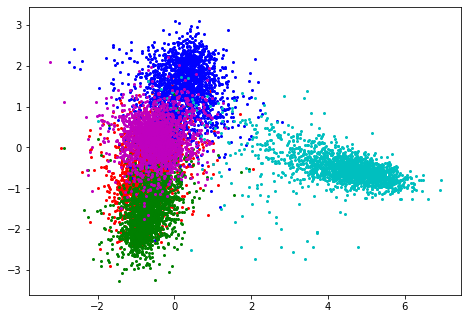

In [11]:
classes = [4,3,2,1,0]
classes_x  = []
classes_y = []
for clss in classes:
    x = train_result.real[0,np.where(y_train == clss)]*100
    y = train_result.real[1,np.where(y_train == clss)]*100
    classes_x.append(x)
    classes_y.append(y)
colors = ['r','b','g','c','m']
markers = ['.',',','x','o','v']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
for i in range(len(classes)):
    ax.scatter( classes_x[i],classes_y[i], color=colors[i], s =  4)

plt.show()

/home/beba/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


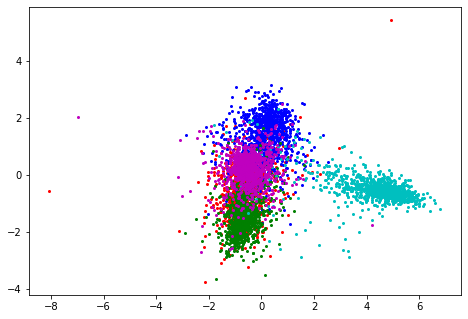

In [12]:
classes = [4,3,2,1,0]
classes_x  = []
classes_y = []
for clss in classes:
    x = test_result[0,np.where(y_test == clss)]*100
    y =test_result[1,np.where(y_test == clss)]*100
    classes_x.append(x)
    classes_y.append(y)
colors = ['r','b','g','c','m']
markers = ['.',',','x','o','v']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
for i in range(len(classes)):
    ax.scatter( classes_x[i],classes_y[i], color=colors[i], s =  4)

plt.show()

[[-0.000553   -0.01405391 -0.00937212 ... -0.00251905 -0.01435995
  -0.01077147]]
[[ 0.00152932  0.00541648  0.00951528 ... -0.00283336  0.00820109
   0.00351979]]
[[-0.01037298 -0.00591652  0.00043136 ... -0.01202882 -0.00998445
  -0.00566634]]
[[0.03978155 0.03224869 0.04118859 ... 0.05796355 0.04772614 0.04696193]]
[[-0.01201523 -0.00784703  0.00422097 ... -0.01439635 -0.00562238
  -0.00444501]]


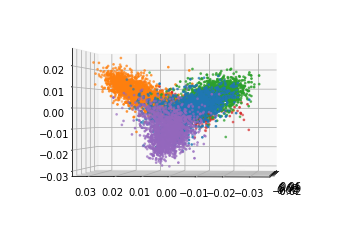

In [42]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
for clss in classes:
    
    print(train_result[0,np.where(y_train == clss)])
    ax.scatter3D(train_result.real[0,np.where(y_train == clss)]
                 ,train_result.real[1,np.where(y_train == clss)],
                 train_result.real[2,np.where(y_train == clss)], cmap='Greens',s = 3);

ax.view_init(0,185)
plt.savefig('3d_plots/0_185_lda')
